# Desafio

### Exercício: Explorando o Conjunto de Dados de Vendas de carros elétricos

**Objetivo:** Utilizar a biblioteca Pandas e Matplotlib para extrair e analisar informações dos conjuntos de dados de vendas de carros elétricos.
link: https://www.kaggle.com/datasets/patricklford/global-ev-sales-2010-2024

Desafios/etapas:
1. importar a biblioteca pandas no Jupyter
2. ler o arquivo .csv
3. apresentar informações básicas do dataset
4. limpar as linhas que possuirem dados vazios
5. plotar um gráfico do tipo "pie" verificando a contagem de cada tipo de veículos (coluna mode).
6. plotar um gráfico do tipo "bar" verificando as 10 primeiras regiões em quantidade de veículos.

In [1]:
#importar as bibliotecas
import pandas as pd #biblioteca para trabalhar com o arquivo .csv
import matplotlib.pyplot as plt #biblioteca para trabalhar com gráficos

In [3]:
#ler arquivo .csv
df = pd.read_csv('../dataset/IEA Global EV Data 2024.csv')

In [5]:
#apresentar as 5 primeiras linhas do DataFrame
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [9]:
#Substituindo os valores vazios
df = df.fillna(0) #Substituir valores vazios com 0

In [11]:
#Pie
df.head()
df['unit'].unique() #tomar cuidado pois 'mode' é uma palavra reservada
#A coluna unit possui valores de unidades diferentes portanto será necessários
#definir a unidade para ser analisda

#A unidade será 'vehicles' portanto é necessário criar um novo dataframe
#com apenas essas linhas
df_vehicles = df.loc[df['unit'] == 'Vehicles']

In [13]:
df_vehicles['unit'].unique() #verifica os tipos unicos da coluna 'unit'
df_vehicles['mode'].unique() #verifica os tipos unicos da coluna 'mode'

array(['Cars', 'Buses', 'Vans', 'Trucks'], dtype=object)

Text(0.5, 1.0, 'Distribuição dos Modos de Veículos')

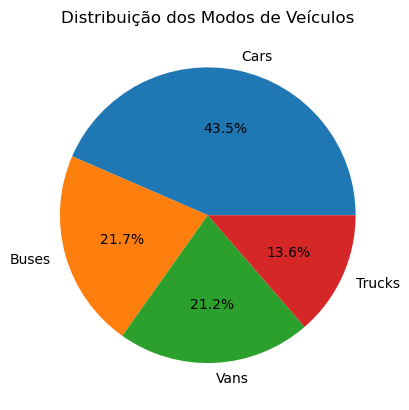

In [23]:
#grafico pire(torta)
etiquetas = df_vehicles['mode'].unique() #verifica os tipos únicos da coluna 'mode'
valores_etiquetas = df_vehicles['mode'].value_counts()
plt.pie(valores_etiquetas, labels=etiquetas, autopct='%1.1f%%')
plt.title('Distribuição dos Modos de Veículos') # Adicionar título ao gráfico

In [29]:
df_vehicles['value'].dtype

#df_vehicles.groupby('region')['value'].sum().head(10).plot(kind='bar')
dictionary_vehicles = df_vehicles.groupby('region')['value'].sum()

sorted(dictionary_vehicles)
dictionary_vehicles.keys()

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'EU27', 'Estonia', 'Europe', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Rest of the world', 'Romania', 'Seychelles',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkiye', 'USA', 'United Arab Emirates',
       'United Kingdom', 'World'],
      dtype='object', name='region')

In [33]:
df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regions', 'Value'])
df_vehicles_region.sort_values(by=['Value'], ascending = False)
#df_vehicles_region

,Regions,Value
51,World,2.520120e+09
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
14,EU27,3.324256e+07
19,Germany,1.020111e+07
18,France,6.787772e+06
50,United Kingdom,6.283637e+06
